Import relevant modules

In [2]:
#import seaborn as sns
import filehandler as tx
import matplotlib.pyplot as plt

Global variables

In [6]:
load_cutoff = 100

margin_step = .1

main_dir = '90815 (Bulk 28kDa)\\Annealing30min2kto260'



temps, file_dict = tx.files_to_dict(main_dir)       #Fetch temperature list and file names from directory


#print(file_dict[temps[2]][1])


In [4]:
big_data = tx.load_files(main_dir, temps, file_dict, load_cutoff)

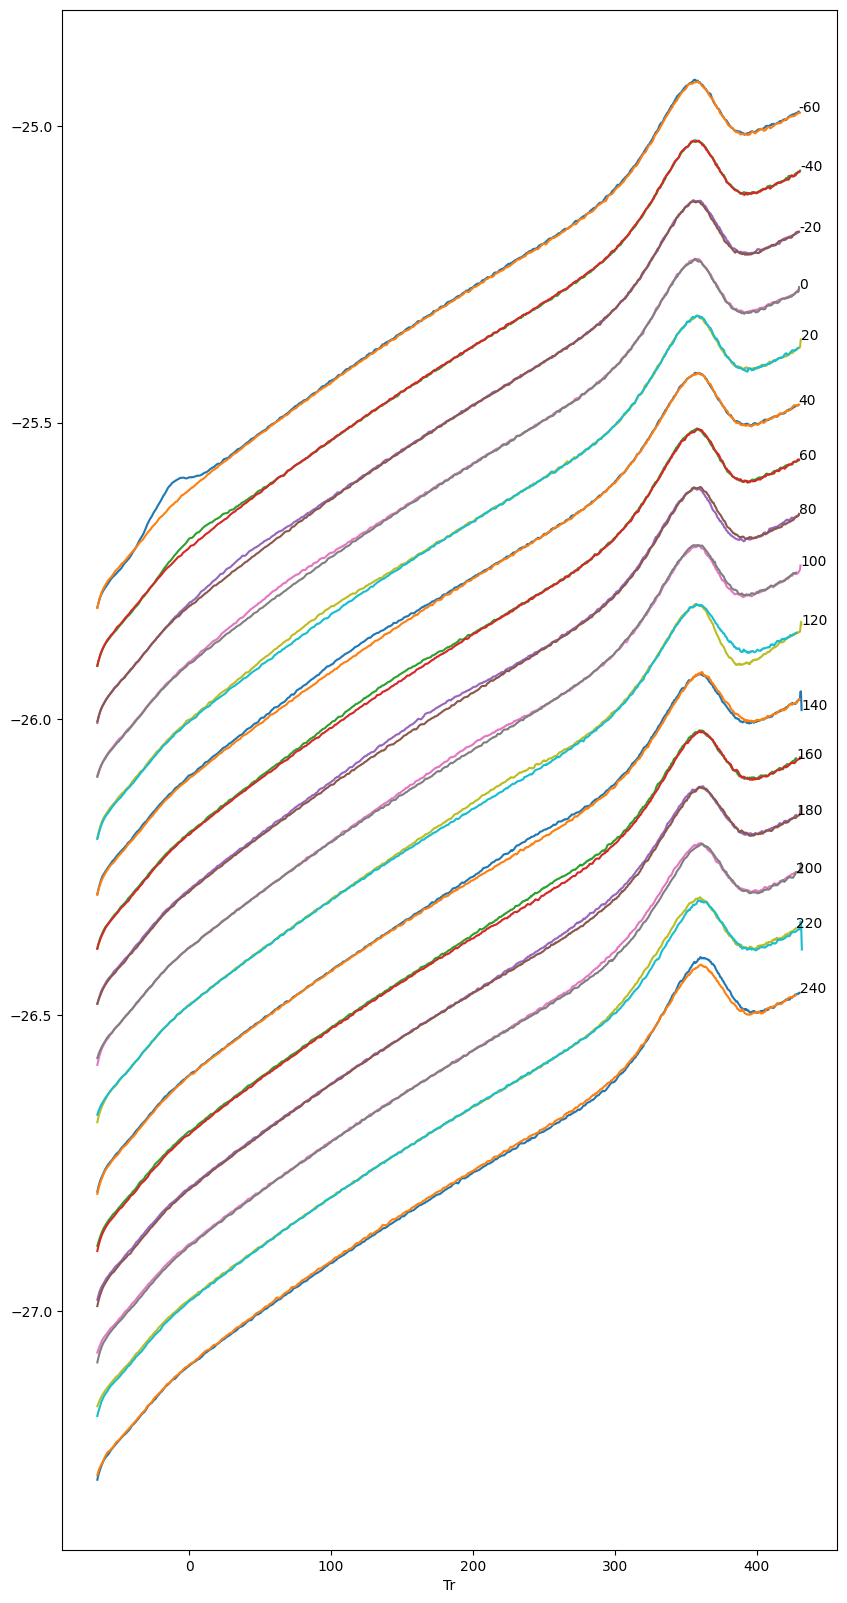

In [12]:
margin = margin_step * (big_data[0][1]['Heat Flow'].max() - big_data[0][1]['Heat Flow'].min())
plt.figure(figsize=(10, 20))
ax1 = plt.gca()
for i in range (1, len(big_data)-1):
    dif = abs(big_data[i][0]['Heat Flow'] - big_data[i-1][0]['Heat Flow']).max()
    big_data[i][0]['Heat Flow'] -= dif + margin
    big_data[i][1]['Heat Flow'] -= dif + margin
    big_data[i][0].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False)
    big_data[i][1].plot(x = 'Tr', y = 'Heat Flow', ax = ax1, legend=False)
    ax1.text(big_data[i][0]['Tr'].iloc[-1], big_data[i][0]['Heat Flow'].iloc[-1], temps[i])